<a href="https://colab.research.google.com/github/aminkhani/Deep-Learning/blob/main/mnist_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt

### 1 - Load mnist Data

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

**preprocessing On Data**

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train = x_train.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))

In [ ]:
x_val = x_train[:10000]
x_train = x_train[10000:]

In [ ]:
from keras.utils import to_categorical # One-Hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_val = y_train[:10000]
y_train = y_train[10000:]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(50000, 784)
(50000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)


Normilize

In [ ]:
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255

### 2 - Build an architectural network

In [ ]:
from keras.models import Sequential
network = Sequential()
network.add(keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,))) #Hyper Parameters
network.add(keras.layers.Dense(10, activation='softmax'))

### 4 - Complie

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### 5 - Train The Model

In [ ]:
history = network.fit(x_train, y_train, batch_size=64,
                      epochs=50 , validation_data=(x_val, y_val))

Epoch 1/50
782/782 [==============================] - 8s 9ms/step - loss: 0.3999 - accuracy: 0.8813 - val_loss: 0.1410 - val_accuracy: 0.9585
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 0.1050 - accuracy: 0.9683 - val_loss: 0.1031 - val_accuracy: 0.9703
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 0.0678 - accuracy: 0.9789 - val_loss: 0.0826 - val_accuracy: 0.9766
Epoch 4/50
782/782 [==============================] - 6s 8ms/step - loss: 0.0464 - accuracy: 0.9858 - val_loss: 0.0858 - val_accuracy: 0.9755
Epoch 5/50
782/782 [==============================] - 6s 8ms/step - loss: 0.0321 - accuracy: 0.9910 - val_loss: 0.0788 - val_accuracy: 0.9790
Epoch 6/50
782/782 [==============================] - 6s 8ms/step - loss: 0.0277 - accuracy: 0.9915 - val_loss: 0.0813 - val_accuracy: 0.9786
Epoch 7/50
782/782 [==============================] - 6s 8ms/step - loss: 0.0209 - accuracy: 0.9938 - val_loss: 0.0836 - val_accuracy: 0.9796
Epoch 

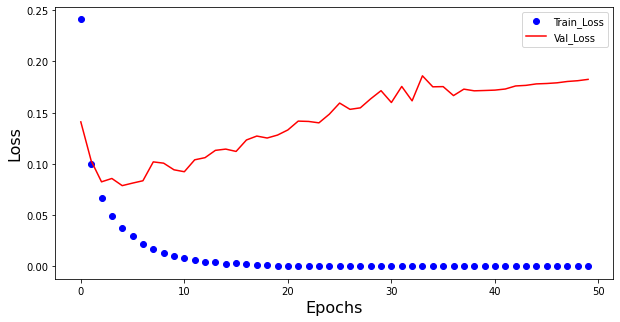

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.epoch, history.history['loss'], 'bo', label='Train_Loss')
plt.plot(history.epoch, history.history['val_loss'], 'r', label='Val_Loss')
plt.xlabel("Epochs", size = 16)
plt.ylabel("Loss", size = 16)
plt.legend()

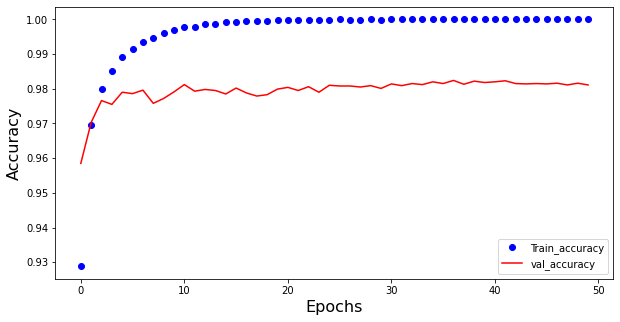

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.epoch, history.history['accuracy'], 'bo', label='Train_accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], 'r', label='val_accuracy')
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend()

### 6 - Evaluate

In [ ]:
network.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 44.8906 - accuracy: 0.9827


[44.890621185302734, 0.982699990272522]